In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import grad

from binarypredictor.datagen import PolyGenerator, DataGenerator
from binarypredictor.poly import Polynomial, PolynomialSet, PolynomialBatch, PolynomialDataLoader
from binarypredictor.net import DerivativeNet

In [2]:
pg = PolyGenerator(4)
pg.add_constraint(0.5, 1, 0)
pg.add_constraint(0.1, 0, 1)
pg.add_constraint(0.8, 0, 1)
pg.add_constraint(0.5, 0, 2)
pg.add_constraint(0.9, 0, 5)
#pg.add_constraint(0.2, 0, 2.5)

qg = PolyGenerator(4)
qg.add_constraint(0.5, 1, 0)
qg.add_constraint(0.1, 0, 2)
qg.add_constraint(0.5, 0, -.2)
qg.add_constraint(0.9, 1, -6)
qg.add_constraint(0.9, 0, 8)
#qg.add_constraint(0.2, 0, 1.5)

rg = PolyGenerator(4)
rg.add_constraint(0.5, 1, 0)
rg.add_constraint(0.1, 0, 1)
rg.add_constraint(0.8, 0, 1)
rg.add_constraint(0.5, 0, 2)
rg.add_constraint(0.9, 0, 5)
#pg.add_constraint(0.2, 0, 2.5)

sg = PolyGenerator(4)
sg.add_constraint(0.5, 1, 0)
sg.add_constraint(0.1, 0, 2)
sg.add_constraint(0.5, 0, -.2)
sg.add_constraint(0.9, 1, -6)
sg.add_constraint(0.9, 0, 8)
#qg.add_constraint(0.2, 0, 1.5)

In [3]:
poly_set = PolynomialSet() 
poly_set.append(Polynomial(pg.get_cfs())) 
poly_set.append(Polynomial(qg.get_cfs()))

poly_set_ = PolynomialSet() 
poly_set_.append(Polynomial(rg.get_cfs())) 
poly_set_.append(Polynomial(sg.get_cfs()))

In [4]:
#pdl = PolynomialDataLoader([poly_set, poly_set_], 4)

#for p in pdl:
#    print(p.get_values(x))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 348.26it/s]


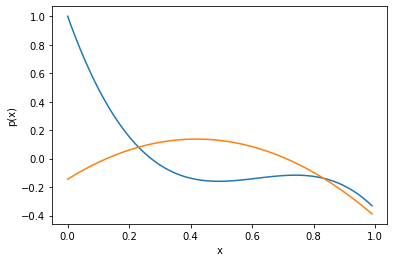

In [5]:
dg = DataGenerator()
dg.generate_data(200)

polys = dg.get_polys()
x = torch.arange(0., 1.0, step=0.01)

for p in polys:
    p.plot(x)
    break

In [6]:
pdl = PolynomialDataLoader(polys, 4)

In [7]:
for i, p in enumerate(pdl):
    print(p.get_values(x, o=0, stack='v').shape)
    print(p.get_values(x, o=1).shape)
    
    break

torch.Size([4, 200, 1])
torch.Size([4, 100, 2])
